<img src="https://miro.medium.com/v2/resize:fit:640/1*hVQp6GjkMF0ynqCLPxSAgA.png" width="1500">

**Project Objective:**

This research aims to create a time series machine learning model that can effectively predict market changes using previous data. We intend to estimate commodity quantities and prices for future months using advanced algorithms, allowing stakeholders to make proactive decisions about production, procurement, pricing strategies, and resource allocation.


# **Step 1 | Import Libraries**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# **Step 2 | Read Dataset**

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

First of all, let's load the dataset:

In [ ]:
# Reading the dataset
df = pd.read_csv("/content/MarketPricePrediction.csv")
df

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012
...,...,...,...,...,...,...,...,...,...,...
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,December-2011
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,December-2012
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,December-2013
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,December-2014


**Dataset:**

The dataset comprises the following columns:

* **market:** The market or commodity under consideration.
* **month:** The month for which the data is recorded.
* **year:** The year corresponding to the recorded data.
* **quantity:** The quantity of the commodity traded or available.
* **priceMin:** The minimum price of the commodity during the month.
* **priceMax:** The maximum price of the commodity during the month.
* **priceMod:** The mode or most frequently occurring price of the commodity
during the month.
* **state:** The state or region where the market is located.
* **city:** The city where the market is situated.
* **date:** The specific date of the recorded data.

# **Step 3 | Dataset Overview**

Next, I'll delve into a detailed exploration of the dataset:

## **Step 3.1 | Dataset Basic Information**

In [ ]:
# Display a concise summary of a dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


**Inferences:**

* **Number of Entries:** The dataset consists of **10227**, ranging from index 0 to 10226.
    
    
* **Columns:** There are **10 columns** in the dataset.
    
    
* **Datatypes:**
    - Half of the columns are of the **int64** data type.
    - Other half of the columns are of the **object** data type.
    
    
* **Missing Values:** There don't appear to be any missing values in the dataset as each column has **10227 non-null** entries.

## **Step 3.2 | Summary Statistics for Numerical Variables**

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

Let's delve into the summary statistics for our __numerical__ attributes:

In [ ]:
# Get summary statistics for the numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,10227.0,2009.022294,4.372841,1996.0,2006.0,2009.0,2013.0,2016.0
quantity,10227.0,76604.880023,124408.698759,20.0,8898.0,27460.0,88356.5,1639032.0
priceMin,10227.0,646.944363,673.121850,16.0,209.0,440.0,828.0,6000.0
priceMax,10227.0,1212.760731,979.658874,145.0,557.0,923.0,1527.0,8192.0
priceMod,10227.0,984.284345,818.471498,80.0,448.0,747.0,1248.0,6400.0


**Numerical Features:**

* **`year`**: This columns indicates that the records span from 1996 to 2016, with the minimum value representing the year 1996 and the maximum value representing the year 2016.

* **`quantity`**: The average quantity of the commodities traded or available is approximately **76604.88**,
with lowest quantity traded or available being **20** and the highest being **1639032**.

* **`priceMin`**: The average minimum price of a commodity during a month is approximately **💲646.94**, with lowest minimum price being **💲16.0** and the highest minimum price being **💲6000.0**.

* **`priceMax`**: The average maximum price of a commodity during a month is approximately **💲1212.76**, with lowest maximum price being **💲145.0** and the highest maximum price being **💲8192.0**.

* **`priceMod`**: The average of most occurring price of a commodity during a month is approximately **💲984.28**, with lowest most occurring price being **💲80.0** and the highest being **💲6400.0**





## **Step 3.3 | Summary Statistics for Categorical Variables**

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

Afterward, let's look at the summary statistics of the categorical features:

In [ ]:
# Get summary statistics for the categorical variables
df.describe(include='object')

,market,month,state,city,date
count,10227,10227,10227,10227,10227
unique,120,12,21,117,242
top,LASALGAON(MS),February,MS,LASALGAON,September-2015
freq,242,930,4354,242,97


**Categorical Features:**

* **`market`**: The number of unique included markets in this dataset are 120, with market **LASALGAON(MS)** having the most entries with frequency 242 out of 10227.

* **`month`**: All the 12 months are included in the dataset for different years, with february month having the most entries with frequency 930 out of 10227.

* **`state`**: The number of included states in this dataset are 21, with **MS** state having the most entries with frequency 4354 out of 10227.

* **`city`**: The number of included cities in this dataset are 117, with **LASALGAON** city having the most entries with frequency 242 out of 10227.

* **`date`**: There is exactly 242 different dates mentioned in the dataset, with the date **September-2015** being the most mentioned date with frequency 97 out of 10227.

# **Step 4 | EDA**

## **Temporal Analysis**

**First, we'll plot time series for quantity.**

In [ ]:
# first we have to turn the datatype of data from object to datetime
df['date'] = pd.to_datetime(df['date'])

<ipython-input-6-7846dfb01a03>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


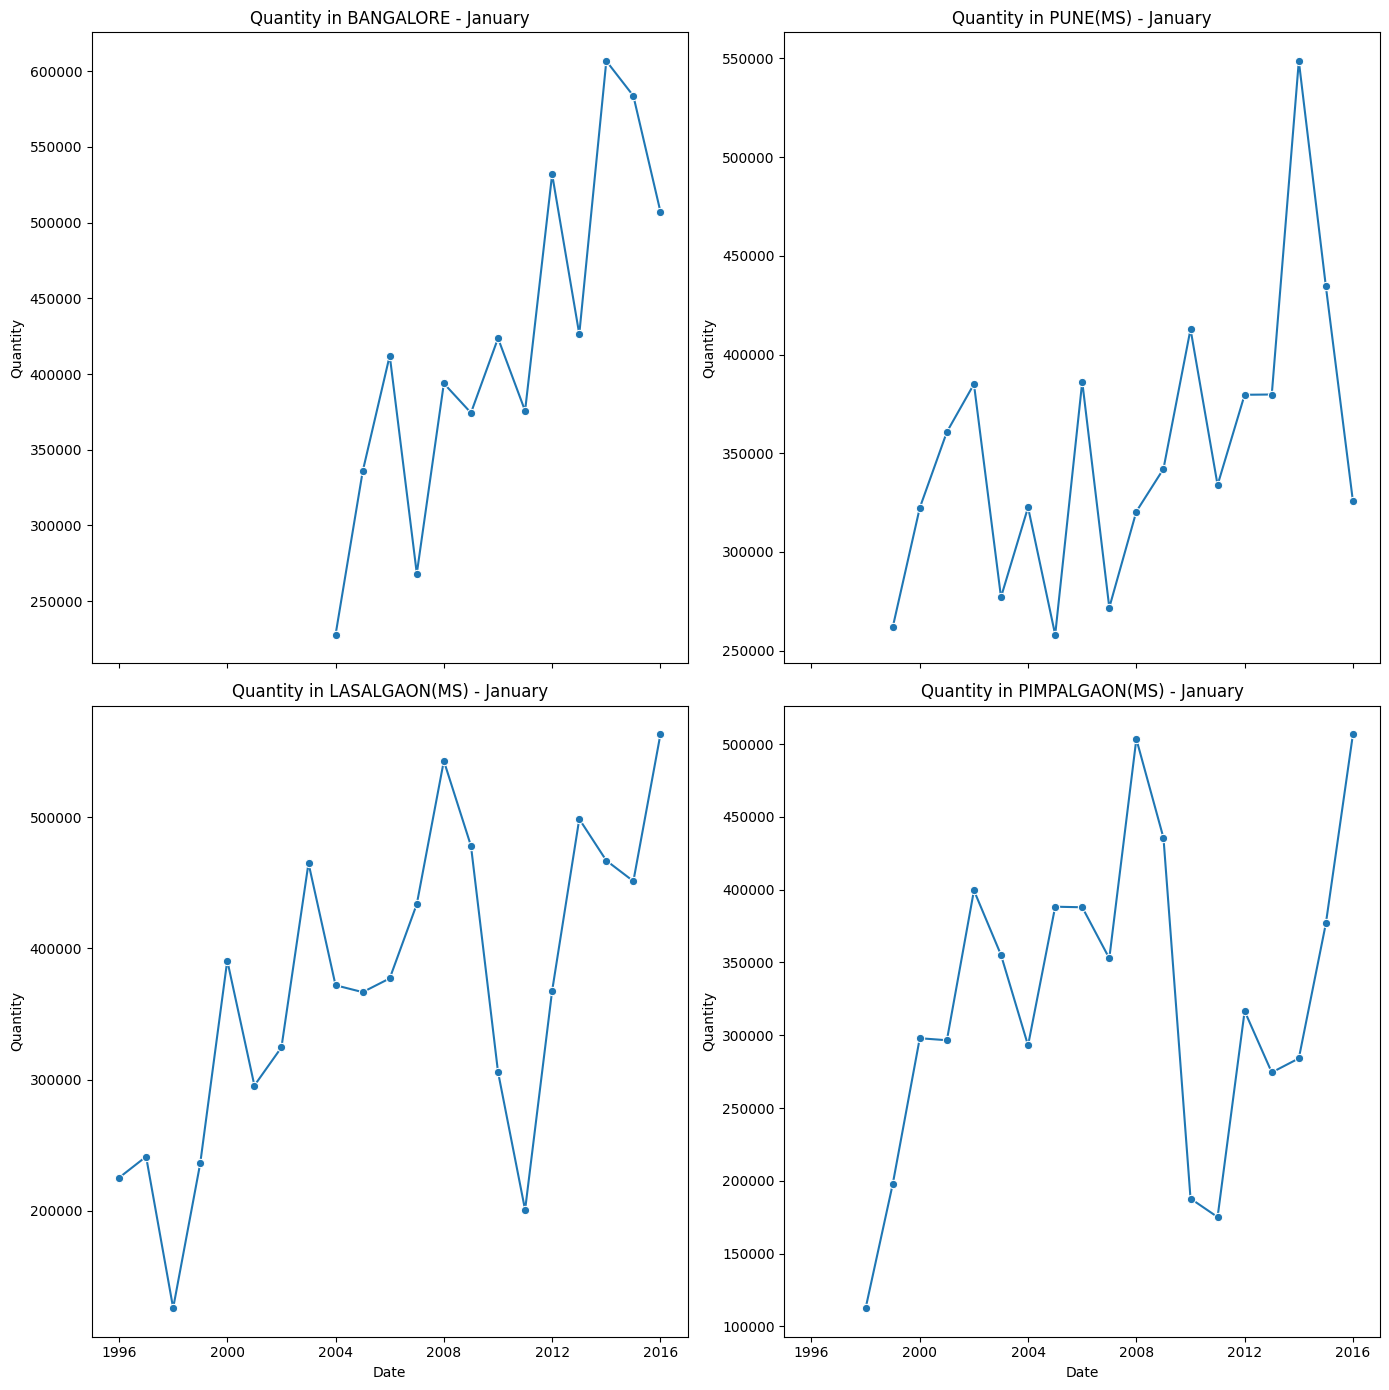

In [ ]:
# Calculate the total quantity for each market
total_quantity_per_market = df.groupby('market')['quantity'].sum()

# Get the top 10 markets with the highest total quantity
top_4_markets = total_quantity_per_market.nlargest(4).index

# Filter the dataset for January data for the top 10 markets
january_data = df[(df['month'] == "January") & (df['market'].isin(top_4_markets))]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 14), sharex=True)
axes = axes.flatten()

# Plot data for each of the top 4 markets
for i, market in enumerate(top_4_markets):
    market_data = january_data[january_data['market'] == market]
    sns.lineplot(ax=axes[i], x='date', y='quantity', data=market_data, marker='o')
    axes[i].set_title(f'Quantity in {market} - January')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Quantity')

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()

**These visualizations show the time series of the top four markets in terms of overall selling quantities in January from 1996 to 2016, with Bangalore Market having the highest quantities, despite debuting in 2004.**

## **Price Analysis**

**Now we will plot the distribution of prices.**

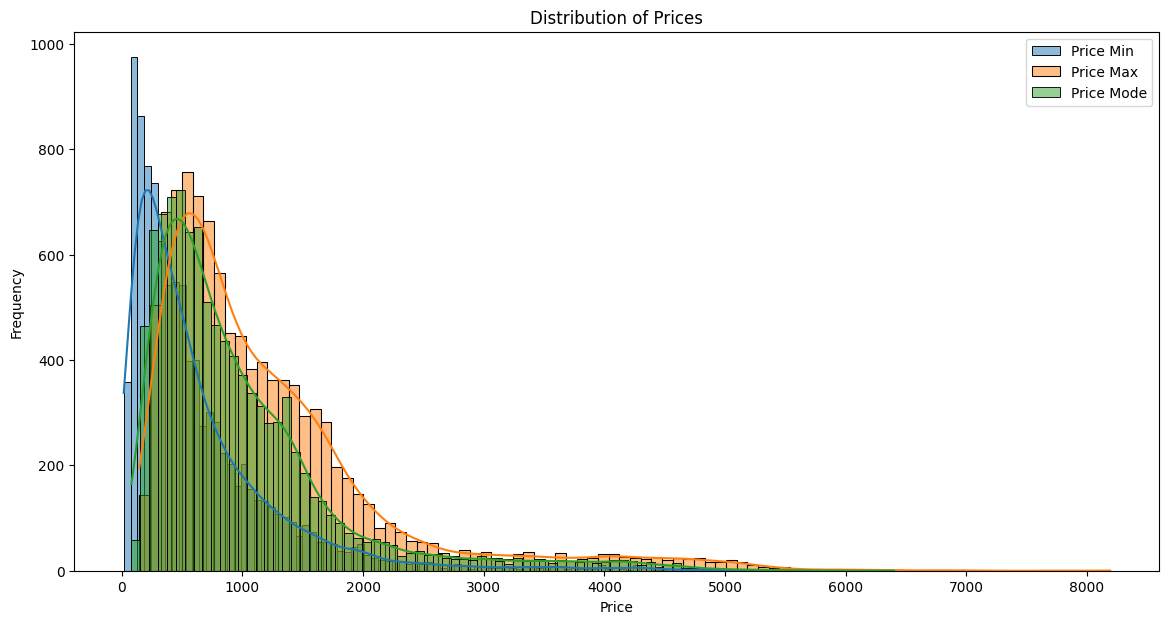

In [ ]:
plt.figure(figsize=(14, 7))

sns.histplot(df['priceMin'], label='Price Min', kde=True)
sns.histplot(df['priceMax'], label='Price Max', kde=True)
sns.histplot(df['priceMod'], label='Price Mode', kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.legend()
plt.show()

**Prices are skewing to the right. This suggests that there are more places priced below the average or median. The average price is higher than the median. This shows that a few really costly places are raising the average price.**

# **Step 5 | Data Preprocessing**

## **Step 5.1 | Missing Value Treatment**

In [ ]:
# Check for missing values in the dataset
df.isnull().sum().sum()

0

 Upon our above inspection, it is obvious that there are no missing values in our dataset. This is ideal as it means we don't have to make decisions about imputation or removal, which can introduce bias or reduce our already limited dataset size.

## **Step 5.2 | Duplicated Values Treatment**

In [ ]:
df.duplicated().sum()

0

Upon our above inspection, we found that there were no duplicated records in our dataset. This is ideal as it helps to ensure the integrity of our data by eliminating redundant entries, thus providing a more accurate analysis

## **Step 5.3 | Datatype Treatment**

We are going to adjust the datatype of some features:

In [ ]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

## **Step 5.4 | Outlier Treatment**

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

I am going to check for outliers using the __IQR method__ for the continuous features:

In [ ]:
df_continuous = df.select_dtypes(include=['number'])

Drawing a boxplot for the continuous features **to detect outliers**:

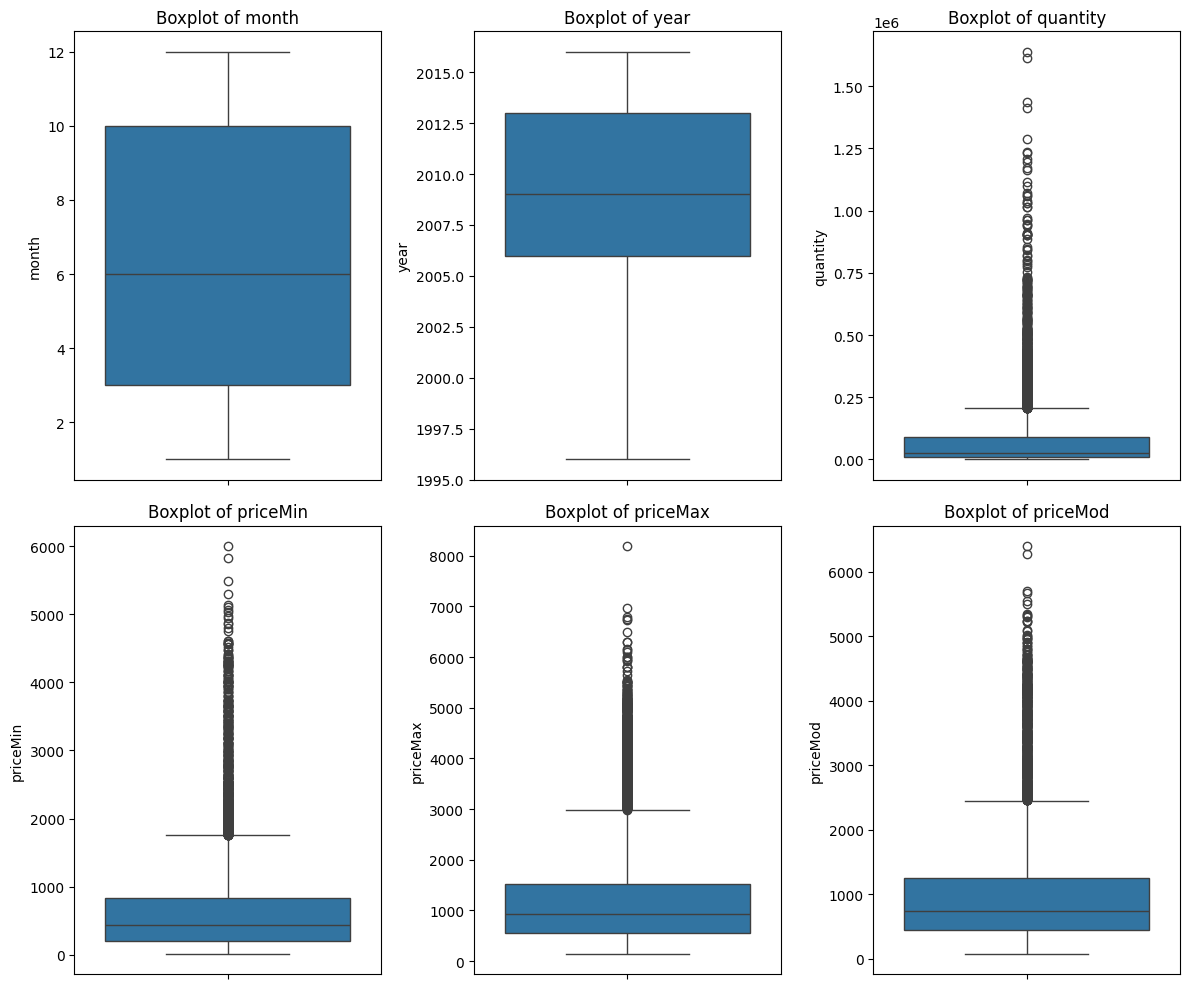

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(12, 10))
axes = axes.flatten()

for i, column in enumerate(df_continuous.columns):
    sns.boxplot(y=df_continuous[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
continuous_features = df_continuous.columns.to_list()

In [ ]:
Q1 = df[continuous_features].quantile(0.25)
Q3 = df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[continuous_features] < (Q1 - 1.5 * IQR)) | (df[continuous_features] > (Q3 + 1.5 * IQR)))

outliers_count_specified = outliers.sum()

print(outliers_count_specified)

month          0
year           0
quantity    1188
priceMin     618
priceMax     664
priceMod     617
dtype: int64


Upon identifying outliers for the specified continuous features, we found the following:

**There are some outliers detected in this data**

In [ ]:
df_replaced = df.copy()
for column in continuous_features:
    median = df[column].median()
    df_replaced[column] = np.where(outliers[column], median, df[column])

print("\nDataFrame after replacing outliers with the median:\n", df_replaced)


DataFrame after replacing outliers with the median:
            market  month    year  quantity  priceMin  priceMax  priceMod  \
0      ABOHAR(PB)    1.0  2005.0    2350.0     404.0     493.0     446.0   
1      ABOHAR(PB)    1.0  2006.0     900.0     487.0     638.0     563.0   
2      ABOHAR(PB)    1.0  2010.0     790.0    1283.0    1592.0    1460.0   
3      ABOHAR(PB)    1.0  2011.0     245.0     440.0     923.0     747.0   
4      ABOHAR(PB)    1.0  2012.0    1035.0     523.0     686.0     605.0   
...           ...    ...     ...       ...       ...       ...       ...   
10222   YEOLA(MS)   12.0  2011.0  131326.0     282.0     612.0     526.0   
10223   YEOLA(MS)   12.0  2012.0  207066.0     485.0    1327.0    1136.0   
10224   YEOLA(MS)   12.0  2013.0   27460.0     472.0    1427.0    1177.0   
10225   YEOLA(MS)   12.0  2014.0  201077.0     446.0    1654.0    1456.0   
10226   YEOLA(MS)   12.0  2015.0   27460.0     609.0    1446.0    1126.0   

      state    city       date  


We replaced the outliers in the data with median since replacing outliers with the median helps maintain the overall distribution of the data. It prevents the introduction of false bias that could occur if outliers were deleted or replaced with the mean. This is critical for algorithms that assume normal distribution or rely on the data's statistical features.

## **Step 5.5 | Categorical Features Encoding**

In [ ]:
label_encoder = LabelEncoder()
df_replaced['month'] = label_encoder.fit_transform(df_replaced['month'])
df_replaced['market'] = label_encoder.fit_transform(df_replaced['market'])
df_replaced['state'] = label_encoder.fit_transform(df_replaced['state'])
df_replaced['city'] = label_encoder.fit_transform(df_replaced['city'])

In [ ]:
df_replaced.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,0,0,2005.0,2350.0,404.0,493.0,446.0,16,0,2005-01-01
1,0,0,2006.0,900.0,487.0,638.0,563.0,16,0,2006-01-01
2,0,0,2010.0,790.0,1283.0,1592.0,1460.0,16,0,2010-01-01
3,0,0,2011.0,245.0,440.0,923.0,747.0,16,0,2011-01-01
4,0,0,2012.0,1035.0,523.0,686.0,605.0,16,0,2012-01-01


In [ ]:
df_replaced.tail()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
10222,119,11,2011.0,131326.0,282.0,612.0,526.0,14,116,2011-12-01
10223,119,11,2012.0,207066.0,485.0,1327.0,1136.0,14,116,2012-12-01
10224,119,11,2013.0,27460.0,472.0,1427.0,1177.0,14,116,2013-12-01
10225,119,11,2014.0,201077.0,446.0,1654.0,1456.0,14,116,2014-12-01
10226,119,11,2015.0,27460.0,609.0,1446.0,1126.0,14,116,2015-12-01


## **Step 5.6 | Feature Engineering**

**Feature engineering** transforms raw data into meaningful features, improving model performance by capturing underlying patterns and relationships. This step addresses data quality issues, enhances interpretability, reduces dimensionality, and creates new informative features, ultimately leading to more accurate and robust models.

In [ ]:
# Create lagged features
df_replaced['priceMod_lag1'] = df_replaced['priceMod'].shift(1)
df_replaced['quantity_lag1'] = df_replaced['quantity'].shift(1)

In [ ]:
# Create rolling statistics
df_replaced['priceMod_roll_mean'] = df_replaced['priceMod'].rolling(window=3).mean()
df_replaced['quantity_roll_mean'] = df_replaced['quantity'].rolling(window=3).mean()

In [ ]:
# Create seasonal indicators
df_replaced['is_month_start'] = df_replaced['date'].dt.is_month_start.astype(int)
df_replaced['is_month_end'] = df_replaced['date'].dt.is_month_end.astype(int)

In [ ]:
# Drop rows with NaN values generated by feature engineering
df_replaced.dropna(inplace=True)

# Display the dataset with new features
df_replaced.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,priceMod_lag1,quantity_lag1,priceMod_roll_mean,quantity_roll_mean,is_month_start,is_month_end
2,0,0,2010.0,790.0,1283.0,1592.0,1460.0,16,0,2010-01-01,563.0,900.0,823.000000,1346.666667,1,0
3,0,0,2011.0,245.0,440.0,923.0,747.0,16,0,2011-01-01,1460.0,790.0,923.333333,645.000000,1,0
4,0,0,2012.0,1035.0,523.0,686.0,605.0,16,0,2012-01-01,747.0,245.0,937.333333,690.000000,1,0
5,0,0,2013.0,675.0,1327.0,1900.0,1605.0,16,0,2013-01-01,605.0,1035.0,985.666667,651.666667,1,0
6,0,0,2014.0,440.0,1025.0,1481.0,1256.0,16,0,2014-01-01,1605.0,675.0,1155.333333,716.666667,1,0


# **Step 6 | Model Building**

## **Step 6.1 | Defining Sarima Model**

In [ ]:
model = SARIMAX(df_replaced['quantity'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


## **Step 6.2 | Training the model**

In [ ]:
sarima_fit = model.fit(disp=False)

In [ ]:
# Summary of the model
print(sarima_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           quantity   No. Observations:                10225
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood             -121350.494
Date:                            Tue, 28 May 2024   AIC                         242710.988
Time:                                    19:06:06   BIC                         242747.145
Sample:                                         0   HQIC                        242723.214
                                          - 10225                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0963      0.007     13.241      0.000       0.082       0.111
ma.L1         -0.8932      0.004   

## **Step 6.3 | Model Evaluation**

In [ ]:
# Predictions
df_replaced['forecast'] = sarima_fit.predict(start=0, end=len(df_replaced)-1)

In [ ]:
# Calculate metrics
mae = mean_absolute_error(df_replaced['quantity'], df_replaced['forecast'])
mse = mean_squared_error(df_replaced['quantity'], df_replaced['forecast'])
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 22170.584008794776
MSE: 1223779578.1544316
RMSE: 34982.56105768175
